## Decision Tree Model for Fraud Check

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use("ggplot")
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

In [2]:
df=pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.shape

(600, 6)

### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


### Check for Duplicates

In [5]:
df.duplicated().sum()

0

### Check for Outliers

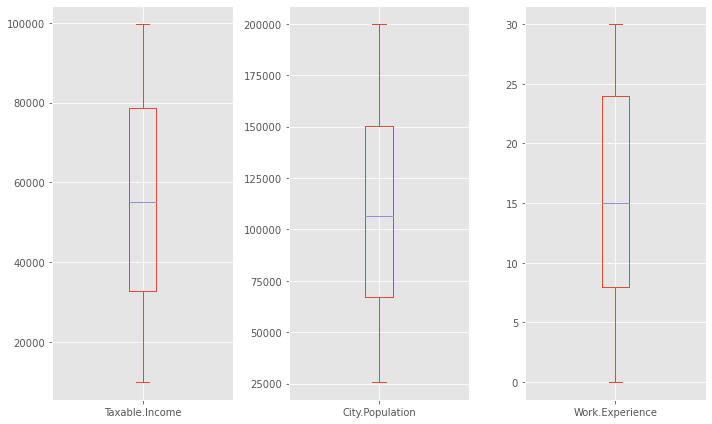

In [6]:
df.plot(kind='box',subplots=True,figsize=(10,6))
plt.tight_layout();

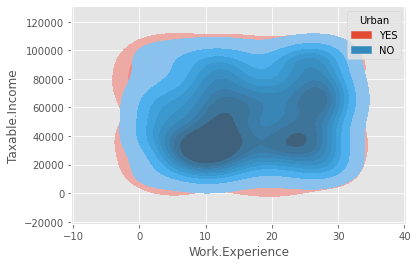

In [7]:
sns.kdeplot(data=df,x="Work.Experience",y="Taxable.Income",hue="Urban",fill=True);

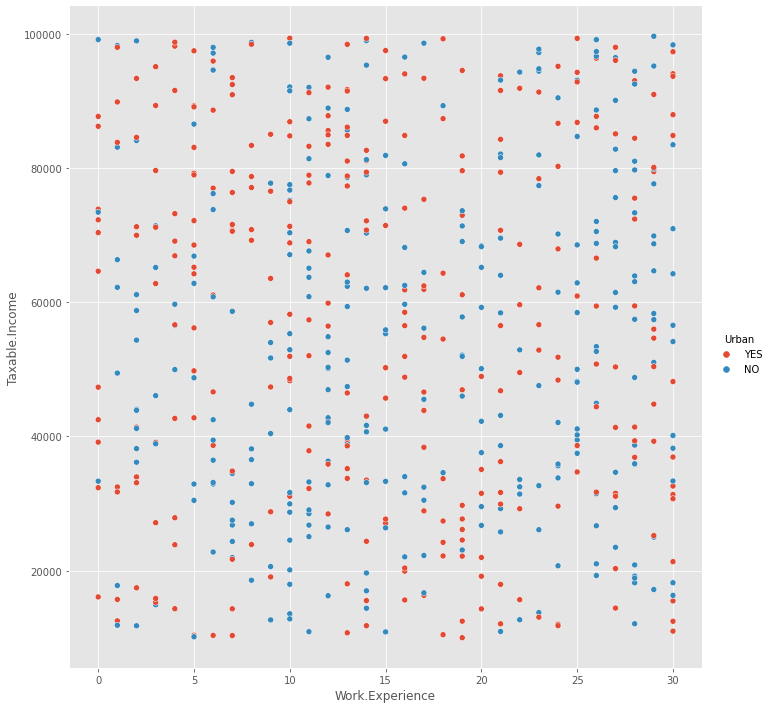

In [8]:
sns.pairplot(data=df,x_vars="Work.Experience",y_vars="Taxable.Income",hue="Urban",height=10,aspect=1);

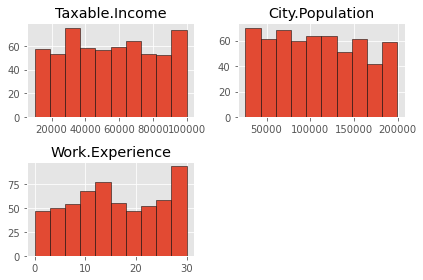

In [9]:
df.hist(edgecolor='k')
plt.tight_layout();

### Check for Missing Values

In [10]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

### Corelation Analysis

In [11]:
corel=np.round(df.corr(),2)
corel

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.00,-0.06,-0.00
City.Population,-0.06,1.00,0.01
Work.Experience,-0.00,0.01,1.00


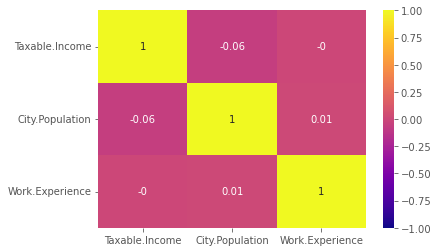

In [12]:
sns.heatmap(data=corel,vmin=-1,vmax=1,cmap='plasma',annot=True);

### Predictive Power score

In [13]:
import ppscore as pps 
pps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Undergrad,Undergrad,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Undergrad,Marital.Status,0.000000,classification,True,weighted F1,0.333333,0.211271,DecisionTreeClassifier()
2,Undergrad,Taxable.Income,0.000000,regression,True,mean absolute error,22771.961667,22779.973615,DecisionTreeRegressor()
3,Undergrad,City.Population,0.006556,regression,True,mean absolute error,42730.781667,42450.626013,DecisionTreeRegressor()
4,Undergrad,Work.Experience,0.000000,regression,True,mean absolute error,7.598333,7.710043,DecisionTreeRegressor()
5,Undergrad,Urban,0.000000,classification,True,weighted F1,0.493333,0.437896,DecisionTreeClassifier()
6,Marital.Status,Undergrad,0.000000,classification,True,weighted F1,0.513333,0.464649,DecisionTreeClassifier()
7,Marital.Status,Marital.Status,1.000000,predict_itself,True,None,0.000000,1.000000,None
8,Marital.Status,Taxable.Income,0.007396,regression,True,mean absolute error,22771.961667,22603.545807,DecisionTreeRegressor()
9,Marital.Status,City.Population,0.000000,regression,True,mean absolute error,42730.781667,42890.394252,DecisionTreeRegressor()


### Preprocessing - Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df[['Undergrad', 'Marital.Status', 'Urban']]=df[['Undergrad', 'Marital.Status', 'Urban']].apply(label.fit_transform)

In [15]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


### Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [16]:
df["Taxable.Income"]=np.where(df["Taxable.Income"]<=30000,"Risky","Good")

In [17]:
df["Taxable.Income"].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [18]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0


### Segregate the data into independent features and target feature since we are using sklearn librarby to build model

In [19]:
x=df.drop("Taxable.Income",axis=1)
y=df["Taxable.Income"]

### Split the data into training and testing dataset

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
y_train.value_counts()

Good     382
Risky     98
Name: Taxable.Income, dtype: int64

In [22]:
y_test.value_counts()

Good     94
Risky    26
Name: Taxable.Income, dtype: int64

### Building Decision Tree Model 

In [23]:
dtree=DecisionTreeClassifier(random_state=0)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [24]:
y.unique()

array(['Good', 'Risky'], dtype=object)

### Decision Tree Visualization

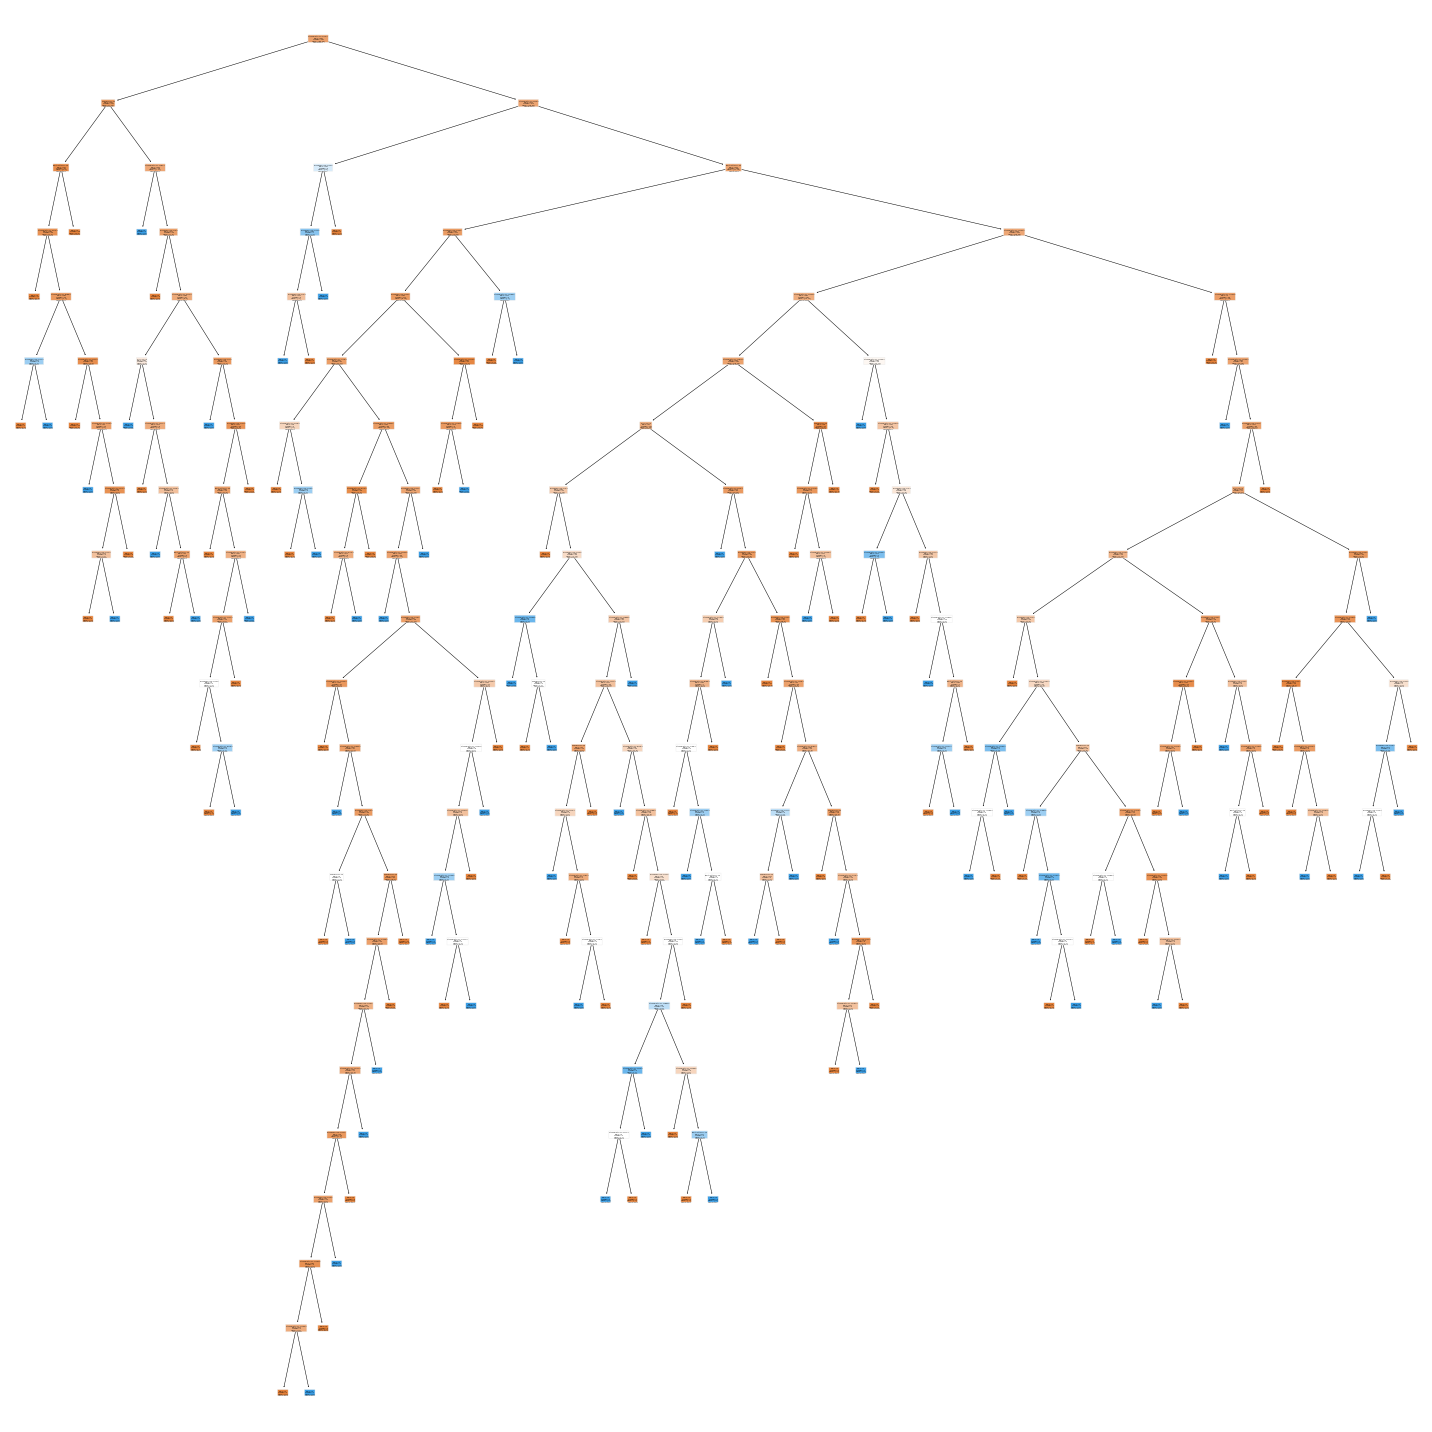

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(dtree,feature_names=x.columns,class_names=y.unique(),filled=True,rounded=True)
plt.tight_layout();

### Predictions for Train and Test Dataset

In [26]:
# predict on the train and test data

pred_train=dtree.predict(x_train)
pred_test=dtree.predict(x_test)

In [27]:
pred_train[:5]

array(['Good', 'Good', 'Good', 'Good', 'Risky'], dtype=object)

In [28]:
pred_test[:5]

array(['Good', 'Risky', 'Good', 'Good', 'Risky'], dtype=object)

### Confusion Matrix for Train Dataset

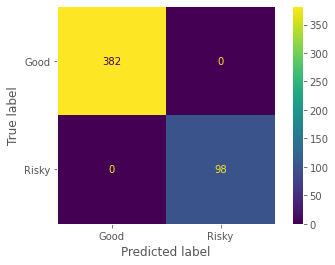

In [29]:
# plot the confusion matrix for train data

from sklearn.metrics import ConfusionMatrixDisplay
# Training daatset
ConfusionMatrixDisplay.from_predictions(y_train,pred_train,display_labels=y.unique())
plt.grid(False);


### Evaluation of model using Precision Score for Train Dataset

In [30]:
# Calculate precision score for train data
precision_train=precision_score(y_train,pred_train,pos_label="Good")
precision_train

1.0

In [31]:
precision_train=precision_score(y_train,pred_train,pos_label="Risky")
precision_train

1.0

### Confusion Matrix for Test Dataset

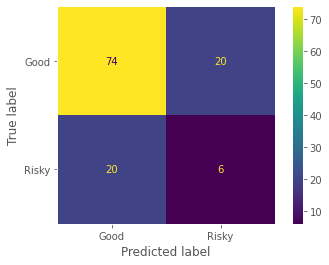

In [32]:
# Test Datset
ConfusionMatrixDisplay.from_predictions(y_test,pred_test,display_labels=y.unique())
plt.grid(False);


### Evaluation of model using Precision Score for Test Dataset

In [33]:
precision_test=precision_score(y_test,pred_test,pos_label="Good")
precision_test

0.7872340425531915

In [34]:
precision_test=precision_score(y_test,pred_test,pos_label="Risky")
precision_test

0.23076923076923078

#### Therefore this model is good in predicting the customers who are good but not good for predicting the Risky cutsomers so its not adequate.